In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score,  f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
path = './dataset/raw.csv'

df = pd.read_csv(path)
df.columns = df.columns.str.lower()

In [3]:
df.head()

,diabetes,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df['diabetes'].value_counts()

diabetes
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [5]:
df = df.query('diabetes != 1')
df['diabetes'].value_counts()

diabetes
0.0    213703
2.0     35346
Name: count, dtype: int64

In [6]:
mean = df.isna().mean() * 100
mean

diabetes                0.0
highbp                  0.0
highchol                0.0
cholcheck               0.0
bmi                     0.0
smoker                  0.0
stroke                  0.0
heartdiseaseorattack    0.0
physactivity            0.0
fruits                  0.0
veggies                 0.0
hvyalcoholconsump       0.0
anyhealthcare           0.0
nodocbccost             0.0
genhlth                 0.0
menthlth                0.0
physhlth                0.0
diffwalk                0.0
sex                     0.0
age                     0.0
education               0.0
income                  0.0
dtype: float64

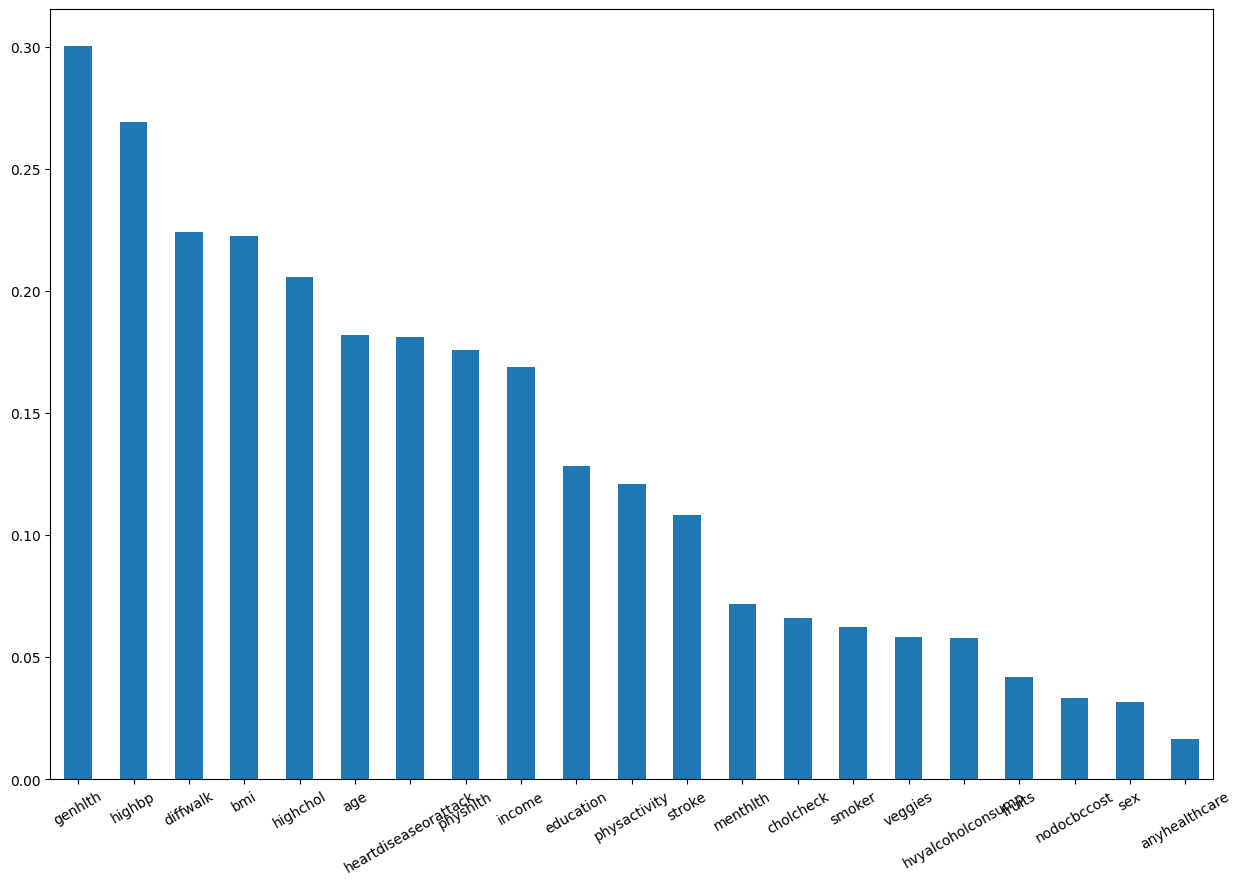

In [7]:
plt.figure(figsize=(15,10))
df.corr()['diabetes'].abs().sort_values(ascending=False).drop('diabetes').plot(kind='bar')
plt.xticks(rotation = 30)
plt.show()

In [8]:
df = df.drop(columns=["menthlth", 'cholcheck', 'smoker', 'veggies', 'hvyalcoholconsump', 'nodocbccost', 'sex', 'anyhealthcare', 'fruits'])

In [9]:
df.head()

,diabetes,highbp,highchol,bmi,stroke,heartdiseaseorattack,physactivity,genhlth,physhlth,diffwalk,age,education,income
0,0.0,1.0,1.0,40.0,0.0,0.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,5.0,4.0


In [10]:
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

In [11]:
X

,highbp,highchol,bmi,stroke,heartdiseaseorattack,physactivity,genhlth,physhlth,diffwalk,age,education,income
0,1.0,1.0,40.0,0.0,0.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,25.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,28.0,0.0,0.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0
3,1.0,0.0,27.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,24.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,45.0,0.0,0.0,0.0,3.0,5.0,0.0,5.0,6.0,7.0
253676,1.0,1.0,18.0,0.0,0.0,0.0,4.0,0.0,1.0,11.0,2.0,4.0
253677,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,23.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0,5.0,1.0


In [12]:
y.value_counts()

diabetes
0.0    213703
2.0     35346
Name: count, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train.value_counts()

diabetes
0.0    170926
2.0     28313
Name: count, dtype: int64

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

num_samples_0 = 30000
num_samples_2 = 28313

rus = RandomUnderSampler(sampling_strategy={0: num_samples_0, 2: num_samples_2}, random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
y_train_res.value_counts()

diabetes
0.0    30000
2.0    28313
Name: count, dtype: int64

In [15]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_res, y_train_res)
y_pred = svm_model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

In [17]:
accuracy, precision, recall, f1

(0.7296928327645051, 0.6331336581835635, 0.74924121900076, 0.6344591457119138)

In [18]:
test_data = [[1.0, 1.0, 40.0, 0.0, 0.0, 0.0, 5.0, 15.0, 1.0, 9.0, 4.0, 3.0]]

x_test_data = pd.DataFrame(data=test_data, columns=X.columns)

x_test_data = scaler.transform(x_test_data)

y_pred = svm_model.predict(x_test_data)

y_pred

array([2.])